<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Stratifying-target-y" data-toc-modified-id="Stratifying-target-y-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stratifying target y</a></span><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Create-some-data" data-toc-modified-id="Create-some-data-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Create some data</a></span></li><li><span><a href="#Get-'original'-frequencies" data-toc-modified-id="Get-'original'-frequencies-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Get 'original' frequencies</a></span></li><li><span><a href="#Train-test-split-without-stratification" data-toc-modified-id="Train-test-split-without-stratification-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Train-test split without stratification</a></span></li><li><span><a href="#Train-Test-split-with-Stratification-of-y-(target)" data-toc-modified-id="Train-Test-split-with-Stratification-of-y-(target)-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Train-Test split with Stratification of y (target)</a></span></li></ul></li><li><span><a href="#Multi-label" data-toc-modified-id="Multi-label-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Multi-label</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Create-some-data" data-toc-modified-id="Create-some-data-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Create some data</a></span></li><li><span><a href="#Create-bins" data-toc-modified-id="Create-bins-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Create bins</a></span></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Train test split</a></span></li><li><span><a href="#Show-results" data-toc-modified-id="Show-results-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Show results</a></span></li></ul></li><li><span><a href="#Stratifying--a-feature-X" data-toc-modified-id="Stratifying--a-feature-X-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Stratifying  a feature X</a></span><ul class="toc-item"><li><span><a href="#Binary-or-multiclass" data-toc-modified-id="Binary-or-multiclass-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Binary or multiclass</a></span></li><li><span><a href="#Continuous-features" data-toc-modified-id="Continuous-features-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Continuous features</a></span></li><li><span><a href="#Stratification-of-X-over-multiple-columns" data-toc-modified-id="Stratification-of-X-over-multiple-columns-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Stratification of X over multiple columns</a></span></li></ul></li></ul></li></ul></div>

# Note on Stratification

## Introduction

Train test split as well as cross validation have the option to 'stratify'. 
'Stratification seeks to ensure that each fold is representative of all strata of the data. Generally this is done in a supervised way for classification and aims to ensure each class is (approximately) equally represented across each test fold (which are of course combined in a complementary way to form training folds).'(https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation)
In a large, well balanced data set for a regression or binary classification problem this option will not be likely needed. However when neither or any of these conditions are met this is a nifty feature.

## Stratifying target y

### Classification

The train and test set will retain the original class proportions.

#### Create some data

In [576]:
# Create data objects for the iris dataset
import pandas as pd
from sklearn import datasets
# create data set for multiclass classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets


def multiclass():
    data_multiclass = datasets.load_iris()
    df = pd.DataFrame(data_multiclass['data'],
                      columns=data_multiclass['feature_names'])
    df['ycol'] = data_multiclass['target']
    X = df.drop('ycol', axis=1)
    y = df['ycol'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)
    ss = StandardScaler()
    X_train = (ss.fit_transform(X_train))
    X_test = ss.transform(X_test)
    X = pd.DataFrame(ss.transform(X), columns=df.drop('ycol', axis=1).columns)
#     print('Iris Dataset Data has been created for multiclass ML')
#     print(f'Shape df {df.shape}')
#     print(f'Shape X {X.shape}')
#     print(f'Shape y {y.shape}')
#     print(f'Shape X_train {X_train.shape}')
#     print(f'Shape y_train {y_train.shape}')
#     print(f'Shape X_test {X_test.shape}')
#     print(f'Shape y_test {y_test.shape}')
#     print(f'Mean X {X_train.mean()}, should be close to 0')
#     print(f'Std X {X_train.std()}, should be close to 1')
#     print(f'Available columns {df.columns.values}')
    return df, X, y, X_train, y_train, X_test, y_test

In [577]:
df, X, y, X_train, y_train, X_test, y_test = multiclass()

In [578]:
#abusing make_classification to create 2 extra columns with severely inbalanced classes
from sklearn.datasets import make_classification
X_, y_ = make_classification(n_samples=len(X), 
                             n_features=20, 
                             n_informative=4, 
                             n_redundant=2, 
                             n_repeated=0, 
                             n_classes=6, 
                             n_clusters_per_class=2, 
                             weights=[.05,.05,.1,.1,.2,.5], 
                             flip_y=0.01, 
                             class_sep=1.0, 
                             hypercube=True, 
                             shift=0.0, 
                             scale=1.0, 
                             shuffle=True, 
                             random_state=None)

X['extra']= y_

In [579]:
X['extra'].value_counts(sort=False)

0     7
1     7
2    16
3    16
4    31
5    73
Name: extra, dtype: int64

In [580]:
#abusing make_classification to create 2 extra columns with severely inbalanced classes
from sklearn.datasets import make_classification
X__, y__ = make_classification(n_samples=len(X), 
                             n_features=3, 
                             n_informative=3, 
                             n_redundant=0, 
                             n_repeated=0, 
                             n_classes=2, 
                             n_clusters_per_class=2, 
                             weights=[.4,.6], 
                             flip_y=0.01, 
                             class_sep=1.0, 
                             hypercube=True, 
                             shift=0.0, 
                             scale=1.0, 
                             shuffle=True, 
                             random_state=None)

X['extra1']= y__

In [581]:
X['extra1'].value_counts()

1    89
0    61
Name: extra1, dtype: int64

#### Get 'original' frequencies

In [582]:
# value proportions 'extra1'
print(f'y\tPrec.')
for i in range(0,np.max(X['extra1']+1)):
    print(f'{i}\t{round(X["extra1"].value_counts(sort = False)[i]/X.shape[0],2)}\t%')

y	Prec.
0	0.41	%
1	0.59	%


In [583]:
# value proportions 'extra'
round(X["extra"].value_counts(sort=False)/X.shape[0],2)

0    0.05
1    0.05
2    0.11
3    0.11
4    0.21
5    0.49
Name: extra, dtype: float64

In [584]:
# value proportions 'y'
round(pd.Series(y).value_counts(sort=False)/X.shape[0],2)

0    0.33
1    0.33
2    0.33
dtype: float64

#### Train-test split without stratification

In [585]:
#train test split, stratify = None
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None, test_size=0.1, 
                                                    random_state=2018)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(135, 6) (135,)
(15, 6) (15,)


In [586]:
# value proportions 'y', stratify = None
round(pd.Series(y_train).value_counts(sort=False)/X_train.shape[0],2)

0    0.33
1    0.33
2    0.33
dtype: float64

In [587]:
# value proportions 'extra'
round(X_test["extra"].value_counts(sort=False)/X_test.shape[0],2)

3    0.13
4    0.40
5    0.47
Name: extra, dtype: float64

In [588]:
# value proportions 'extra1'
round(X_train['extra1'].value_counts(sort=False)/X_train.shape[0],2)

0    0.42
1    0.58
Name: extra1, dtype: float64

#### Train-Test split with Stratification of y (target)

In [589]:
#train test split, stratify = y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, 
                                                    random_state=2018)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 6) (100,)
(50, 6) (50,)


In [590]:
# value proportions 'y', stratify = y
round(pd.Series(y_train).value_counts(sort=False)/X_train.shape[0],2)

0    0.33
1    0.34
2    0.33
dtype: float64

In [591]:
# value proportions y
round(X_train["extra"].value_counts(sort=False)/X_train.shape[0],2)

0    0.05
1    0.04
2    0.15
3    0.10
4    0.21
5    0.45
Name: extra, dtype: float64

In [592]:
# value proportions y
round(X_train['extra1'].value_counts(sort=False)/X_train.shape[0],2)

0    0.39
1    0.61
Name: extra1, dtype: float64

### Multi-label



from skmultilearn.model_selection import iterative_train_test_split

X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size = 0.5)

### Regression

Continuous data may not be uniformly distributed. When the target is skewed the need may arise to represent less frequent values equally in all folds or splits. Target y needs to be 'tricked' by associating a bin while retain the original value

#### Create some data

In [603]:
# create data set for regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets


def regression():
    data_regression = datasets.load_diabetes()
    df = pd.DataFrame(data_regression['data'],
                      columns=data_regression['feature_names'])
    df['ycol'] = data_regression['target']
    X = df.drop('ycol', axis=1)
    y = df['ycol'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)
    ss = StandardScaler()
    X_train = (ss.fit_transform(X_train))
    X_test = ss.transform(X_test)
    X = pd.DataFrame(ss.transform(X), columns=df.drop('ycol', axis=1).columns)
#     |values}')
    return df, X, y, X_train, y_train, X_test, y_test

In [604]:
df, X, y, X_train, y_train, X_test, y_test = regression()

#### Create bins

How many bins should be created? Basically as many as possible, as this this retains the original distribution as much as possible. However the constraint is:

'''ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
'''

So the, old-fashioned trial and error,  heuristic approach is likely best

In [605]:
# Create the bins.  

bins = np.linspace(0, X.shape[0], 20)

# Save your y values in a new ndarray,
# broken down by the bins created above.

y_binned = np.digitize(y, bins)

In [606]:
#proportional binned_y values
round(pd.Series(y_binned).value_counts(sort=False)/X_train.shape[0],2)

2     0.04
3     0.18
4     0.20
5     0.16
6     0.13
7     0.13
8     0.13
9     0.10
10    0.08
11    0.09
12    0.11
13    0.05
14    0.03
15    0.01
dtype: float64

In [607]:
#Just to show what it looks like print the first 10 only
y__zipped = []
y_zipped = zip(y, y_binned)
print(f'value','\b','bin#')
for i in y_zipped:
    y__zipped.append(i)
for i in y__zipped[:10]:
    print(f'{i[0]}\t{i[1]}')

value  bin#
151.0	7
75.0	4
141.0	7
206.0	9
135.0	6
97.0	5
138.0	6
63.0	3
110.0	5
310.0	14


#### Train test split

In [608]:
#train test split without statification

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    stratify=None,
                                                    random_state=2)

In [609]:
#Pass y_binned to the stratify argumentand sklearn will handle the rest
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    stratify=y_binned,
                                                    random_state=2)

#### Show results

In [610]:

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

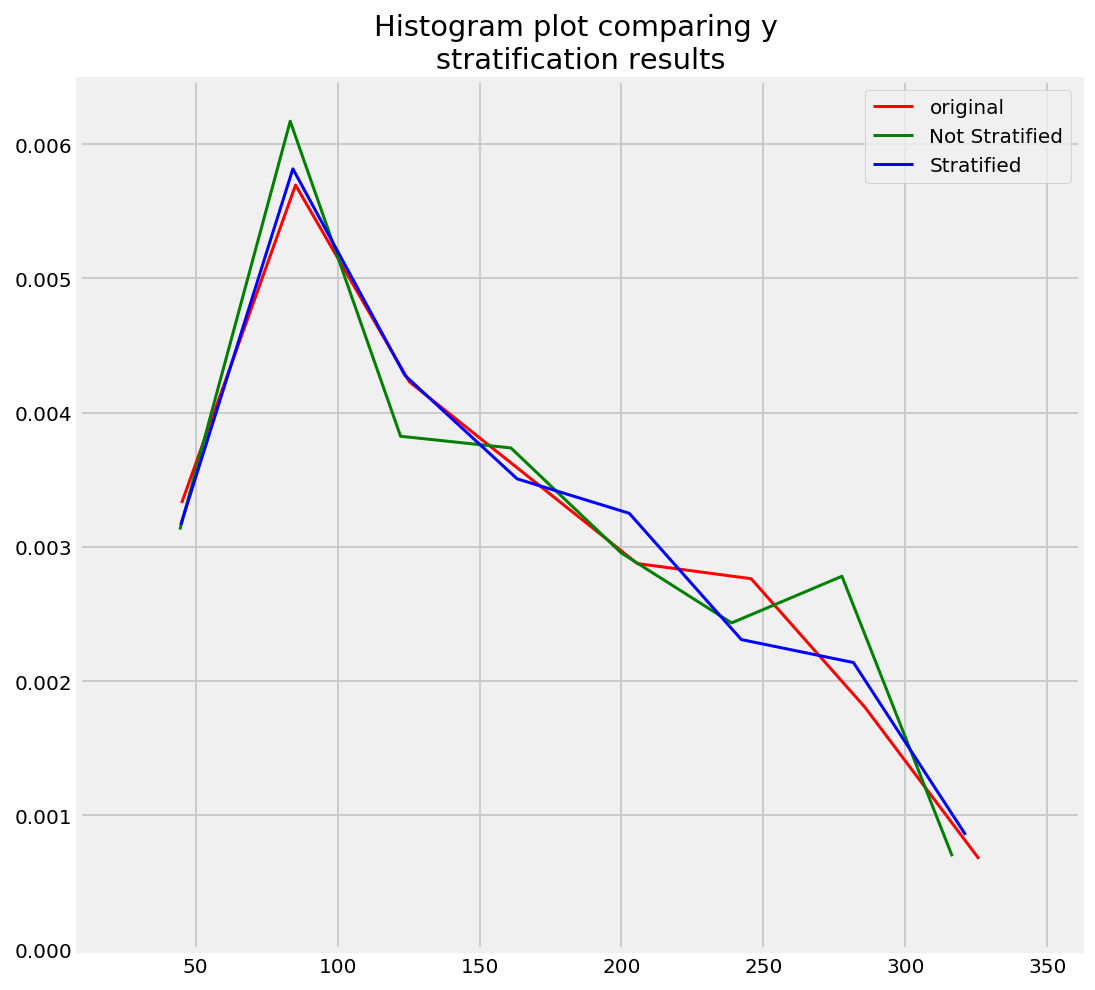

In [611]:
#create normalised histogram 'plot' to compare results
plt.figure(figsize=(8,8))
n,x,_ = plt.hist(y, bins = int(len(y)/50), histtype=u'step', lw=0.0, normed=True )
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n, lw= 1.5, c='r', label='original') ## using bin_centers rather than edges

n_,x_,__= plt.hist(y_train, bins = int(len(y)/50), histtype=u'step',lw=0.0, normed=True )
bin_centers_ = 0.5*(x_[1:]+x_[:-1])
plt.plot(bin_centers_,n_, lw= 1.5, c='g', label='Not Stratified') ## using bin_centers rather than edges

n__,x__,__= plt.hist(y_train_, bins = int(len(y)/50), histtype=u'step',lw=0.0, normed=True )
bin_centers__ = 0.5*(x__[1:]+x__[:-1])
plt.plot(bin_centers__,n__, lw= 1.5, c='b', label='Stratified') ## using bin_centers rather than edges

plt.title('Histogram plot comparing y \nstratification results')
plt.legend(loc='best')
plt.show()

### Stratifying  a feature X 

#### Binary or multiclass

Why the heck would you do this? Well, some features may warrant equal representation in the sets. Features like 'gender' and 'age' etc groups may spring to mind. Example would be predicting salaries in NL. If your data set is unbalanced you may need to take action. 

Luckily Sklearn allows for this, obviously y stratification is lost

In [593]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=X['extra'], test_size=0.3, 
                                                    random_state=2018)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 6) (105,)
(45, 6) (45,)


In [594]:
# value proportions 'y', stratify = 'extra'
round(pd.Series(y_train).value_counts(sort=False)/X_train.shape[0],2)

0    0.39
1    0.32
2    0.29
dtype: float64

In [595]:
# value proportions 'extra', stratify = 'extra'
round(X_train['extra'].value_counts(sort=False)/X_train.shape[0],2)

0    0.05
1    0.05
2    0.10
3    0.10
4    0.21
5    0.49
Name: extra, dtype: float64

In [596]:
# value proportions 'extra1', stratify = 'extra'
round(X_train["extra1"].value_counts(sort=False)/X_train.shape[0],2)

0    0.42
1    0.58
Name: extra1, dtype: float64

#### Continuous features

See Regression solution above

#### Stratification of X over multiple columns

Sklearn allows for this; as long as smallest group is =>2. Obviously this becomes troublesome very quickly as the number of class combinations grows exponentially 

In [597]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=X[['extra', 'extra1']], test_size=0.3, 
                                                    random_state=2018)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 6) (105,)
(45, 6) (45,)


In [598]:
#close
round(X_train['extra'].value_counts(sort=False)/X_train.shape[0],3)

0    0.048
1    0.048
2    0.105
3    0.105
4    0.210
5    0.486
Name: extra, dtype: float64

In [599]:
#exactly right
round(X_train['extra1'].value_counts(sort=False)/X_train.shape[0],2)

0    0.4
1    0.6
Name: extra1, dtype: float64

In [600]:
# value proportions 'y', not startified
round(pd.Series(y_train).value_counts(sort=False)/X_train.shape[0],2)

0    0.30
1    0.37
2    0.33
dtype: float64

In [227]:
import random
X['test'] = [random.randint(0, 5) for x in range(0, X.shape[0])]

round(X['test'].value_counts(sort=False)/X.shape[0],2)

0    0.19
1    0.13
2    0.19
3    0.13
4    0.19
5    0.16
Name: test, dtype: float64

In [651]:
from sklearn.datasets import make_multilabel_classification

# this will generate a random multi-label dataset
X, y = make_multilabel_classification(n_samples=100, 
                                      n_features=20, 
                                      n_classes=5, 
                                      n_labels=2, 
                                      length=50, 
                                      allow_unlabeled=False, 
                                      sparse=False, 
                                      return_indicator='dense', 
                                      return_distributions=False, 
                                      random_state=None)

In [652]:
from skmultilearn.model_selection import iterative_train_test_split

X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size = 0.5)

In [659]:
l = []
for i in y:
    l.append(sum(i))
np.mean(l)

2.29

In [665]:
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

Counter(combination for row in get_combination_wise_output_matrix(y.A, order=2) for combination in row)


NameError: name 'Counter' is not defined